# Capstone Project - Walmart


The objective of this project is to forecast sales of the product for upcoming months/years, so that 
inventory management become easy for the store. If the decision-making authority know what’s the 
demand of each product for a month or year, they would be able to plan the supply chain accordingly.

Predicting future sales for a company is one of the most important aspects of strategic planning. In 
this project we will analyse in depth how internal and external factors of one of the biggest companies 
in the US can affect their Weekly Sales in the future.

The data collected ranges from 2010 to 2012, where 45 Walmart stores across the country were 
included in this analysis. It is important to note that we also have external data available like CPI, 
Unemployment Rate and Fuel Prices in the region of each store which, hopefully, help us to make a 
more detailed analysis

Dataset Information: This is the historical data that covers sales from 2010-02-05 to 2012-11-
01, in the file Walmart. 

The following fields are available here:

 Store - Store number

 Date 

 Weekly Sales - sales for the given store in that week

 Holiday Flag –

 0 – Non holiday week

 1 – Special holiday week

 Temperature - Temperature on the day of sale

 Fuel Price - Cost of fuel in the region

 CPI – Consumer Price Index Consumer Price Indices measures change over time in general 
level of prices of goods and services that households acquire for the purpose of consumption)

 Unemployment - Unemployment Rate

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Step 1: Read & Understand The Input Dataset (Walmart.csv)

In [2]:
data1 = pd.read_csv('Walmart.csv')
data1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
data1.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Univariate Analysis

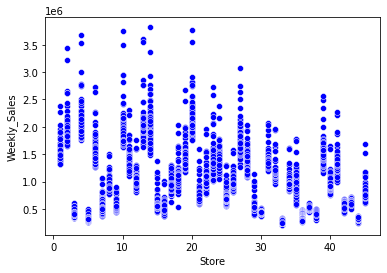

In [5]:
sns.scatterplot(data = data1,x='Store',y='Weekly_Sales',color = 'blue')
plt.show()

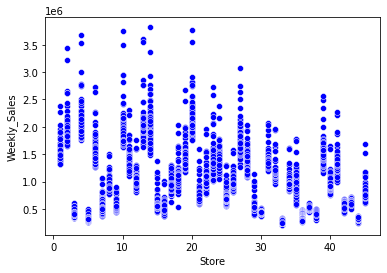

In [6]:
sns.scatterplot(data = data1,x='Store',y='Weekly_Sales',color = 'blue')
plt.show()

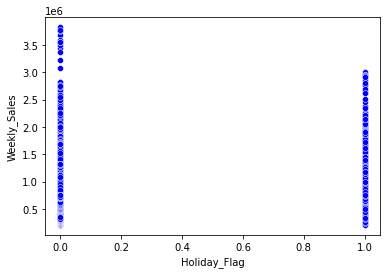

In [7]:
sns.scatterplot(data = data1,x='Holiday_Flag',y='Weekly_Sales',color = 'blue')
plt.show()

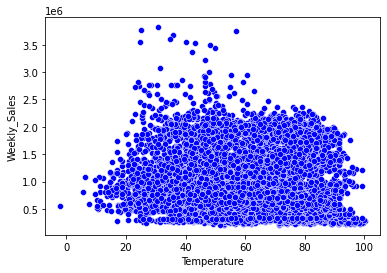

In [8]:
sns.scatterplot(data = data1,x='Temperature',y='Weekly_Sales',color = 'blue')
plt.show()

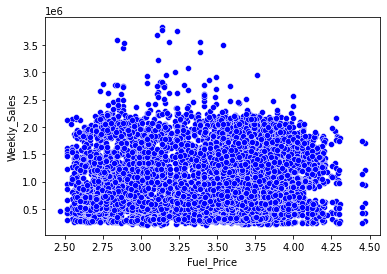

In [9]:
sns.scatterplot(data = data1,x='Fuel_Price',y='Weekly_Sales',color = 'blue')
plt.show()

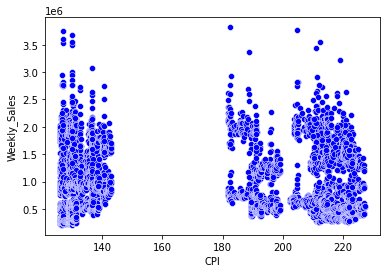

In [10]:
sns.scatterplot(data = data1,x='CPI',y='Weekly_Sales',color = 'blue')
plt.show()

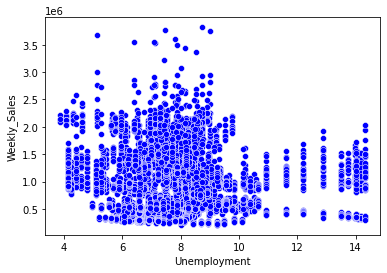

In [11]:
sns.scatterplot(data = data1,x='Unemployment',y='Weekly_Sales',color = 'blue')
plt.show()

In [12]:
data1.set_index('Date', inplace=True)
data1.head()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [13]:
# There are about 45 different stores in this dataset. Lets select the any store id from 1-45
a= int(input("Enter the store id:"))
store4 = data1[data1.Store == a]


Enter the store id:4


In [14]:

store4

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,4,2135143.87,0,43.76,2.598,126.442065,8.623
2010-02-12,4,2188307.39,1,28.84,2.573,126.496258,8.623
2010-02-19,4,2049860.26,0,36.45,2.540,126.526286,8.623
2010-02-26,4,1925728.84,0,41.36,2.590,126.552286,8.623
2010-03-05,4,1971057.44,0,43.49,2.654,126.578286,8.623
...,...,...,...,...,...,...,...
2012-09-28,4,2027620.23,0,71.74,3.666,131.043000,4.077
2012-10-05,4,2209835.43,0,63.07,3.620,131.075667,3.879
2012-10-12,4,2133026.07,0,57.11,3.603,131.108333,3.879


In [15]:
# Grouped weekly sales by store 4
sales4 = pd.DataFrame(store4.Weekly_Sales.groupby(store4.index).sum())
sales4.dtypes
sales4

,Weekly_Sales
Date,
2010-02-05,2135143.87
2010-02-12,2188307.39
2010-02-19,2049860.26
2010-02-26,1925728.84
2010-03-05,1971057.44
...,...
2012-09-28,2027620.23
2012-10-05,2209835.43
2012-10-12,2133026.07


In [16]:
#remove date from index to change its dtype because it clearly isnt acceptable.
sales4.reset_index(inplace = True)


In [17]:
sales4

,Date,Weekly_Sales
0,2010-02-05,2135143.87
1,2010-02-12,2188307.39
2,2010-02-19,2049860.26
3,2010-02-26,1925728.84
4,2010-03-05,1971057.44
...,...,...
138,2012-09-28,2027620.23
139,2012-10-05,2209835.43
140,2012-10-12,2133026.07
141,2012-10-19,2097266.85


In [18]:
#converting 'date' column to a datetime type
sales4['Date'] = pd.to_datetime(sales4['Date'])


In [19]:
sales4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


<Figure size 432x288 with 0 Axes>

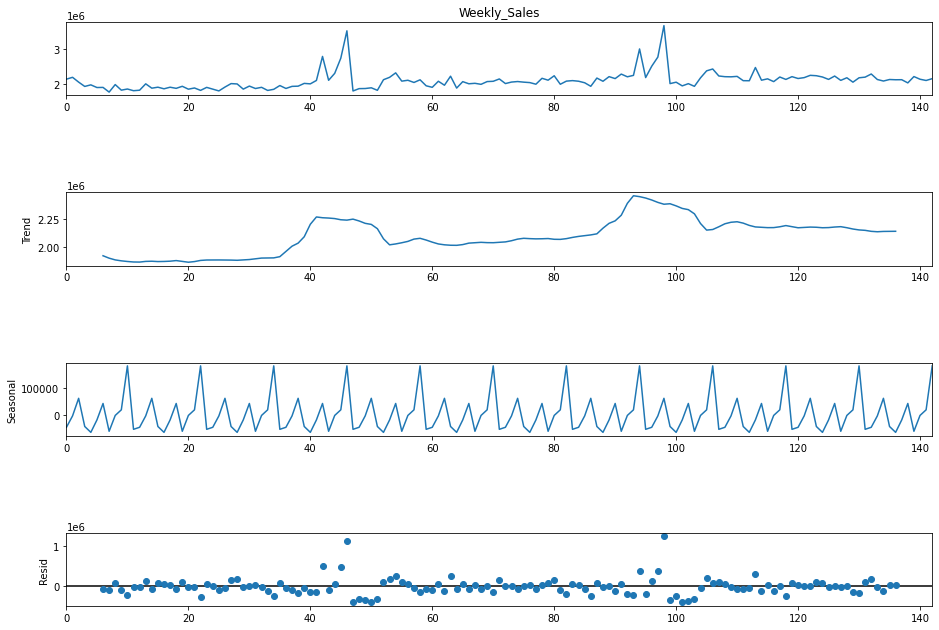

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales4.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 10)
plt.show()

In [21]:
# resetting date back to the index
sales4.set_index('Date',inplace = True)

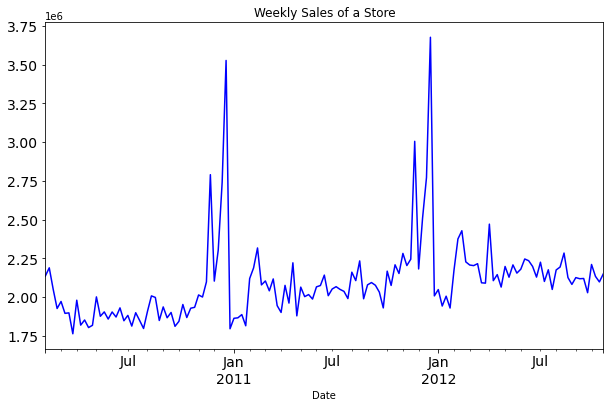

In [22]:
sales4.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

In [23]:
#lets compare the 2012 data of two stores
# Lets take store 5 data for analysis
store6 = data1[data1.Store == 6]
# there are about 45 different stores in this dataset.

sales6 = pd.DataFrame(store6.Weekly_Sales.groupby(store6.index).sum())
sales6.dtypes
# Grouped weekly sales by store 6

#remove date from index to change its dtype because it clearly isnt acceptable.
sales6.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales6['Date'] = pd.to_datetime(sales6['Date'])
# resetting date back to the index
sales6.set_index('Date',inplace = True)

In [24]:
y1=sales4.Weekly_Sales
y2=sales6.Weekly_Sales
y1

Date
2010-02-05    2135143.87
2010-02-12    2188307.39
2010-02-19    2049860.26
2010-02-26    1925728.84
2010-03-05    1971057.44
                 ...    
2012-09-28    2027620.23
2012-10-05    2209835.43
2012-10-12    2133026.07
2012-10-19    2097266.85
2012-10-26    2149594.46
Name: Weekly_Sales, Length: 143, dtype: float64

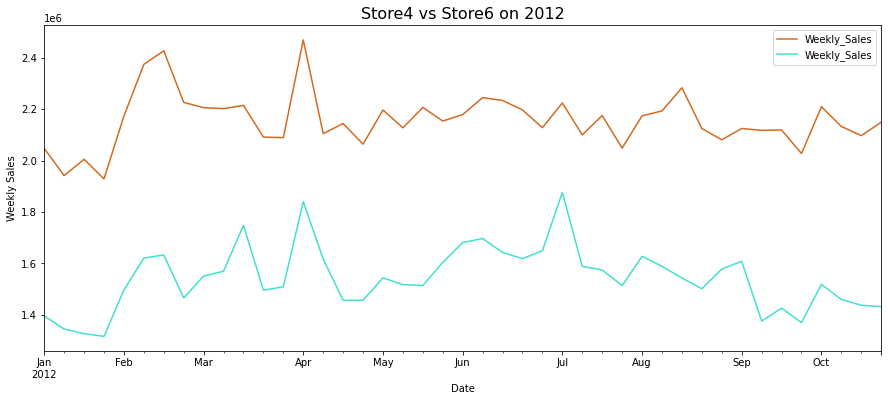

In [25]:
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store6 on 2012', fontsize = '16')
plt.show()

This shows an interesting trend during year ends (during both 2011 & 2012). The best thing is both the stores have almost the same trends and spike just the magnitude is different

In [26]:

# Clearly we can see the irregularities 

In [27]:
# Define the p, d and q parameters to take any value between 0 and 5
p = d = q = range(0, 5)
import itertools
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [28]:
pdq


[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [29]:
seasonal_pdq

[(0, 0, 0, 52),
 (0, 0, 1, 52),
 (0, 0, 2, 52),
 (0, 0, 3, 52),
 (0, 0, 4, 52),
 (0, 1, 0, 52),
 (0, 1, 1, 52),
 (0, 1, 2, 52),
 (0, 1, 3, 52),
 (0, 1, 4, 52),
 (0, 2, 0, 52),
 (0, 2, 1, 52),
 (0, 2, 2, 52),
 (0, 2, 3, 52),
 (0, 2, 4, 52),
 (0, 3, 0, 52),
 (0, 3, 1, 52),
 (0, 3, 2, 52),
 (0, 3, 3, 52),
 (0, 3, 4, 52),
 (0, 4, 0, 52),
 (0, 4, 1, 52),
 (0, 4, 2, 52),
 (0, 4, 3, 52),
 (0, 4, 4, 52),
 (1, 0, 0, 52),
 (1, 0, 1, 52),
 (1, 0, 2, 52),
 (1, 0, 3, 52),
 (1, 0, 4, 52),
 (1, 1, 0, 52),
 (1, 1, 1, 52),
 (1, 1, 2, 52),
 (1, 1, 3, 52),
 (1, 1, 4, 52),
 (1, 2, 0, 52),
 (1, 2, 1, 52),
 (1, 2, 2, 52),
 (1, 2, 3, 52),
 (1, 2, 4, 52),
 (1, 3, 0, 52),
 (1, 3, 1, 52),
 (1, 3, 2, 52),
 (1, 3, 3, 52),
 (1, 3, 4, 52),
 (1, 4, 0, 52),
 (1, 4, 1, 52),
 (1, 4, 2, 52),
 (1, 4, 3, 52),
 (1, 4, 4, 52),
 (2, 0, 0, 52),
 (2, 0, 1, 52),
 (2, 0, 2, 52),
 (2, 0, 3, 52),
 (2, 0, 4, 52),
 (2, 1, 0, 52),
 (2, 1, 1, 52),
 (2, 1, 2, 52),
 (2, 1, 3, 52),
 (2, 1, 4, 52),
 (2, 2, 0, 52),
 (2, 2, 1, 52),
 (2, 2, 

In [30]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\prabh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\prabh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\prabh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7655      0.536     -3.295      0.001      -2.816      -0.715
ar.L2         -1.3104      0.577     -2.271      0.023      -2.441      -0.179
ar.L3         -0.6028      0.252     -2.394      0.017      -1.096      -0.109
ar.L4         -0.1897      0.090     -2.111      0.035      -0.366      -0.014
ma.L1         -1.3666      0.489     -2.795      0.005      -2.325      -0.408
ma.L2         -0.2425      1.048     -0.231      0.817      -2.297       1.812
ma.L3          0.6133      0.584      1.051      0.293      -0.531       1.757
ar.S.L52      -0.0677      0.048     -1.398      0.162      -0.163       0.027
sigma2      1.622e+10   6.38e-11   2.54e+20      0.000    1.62e+10    1.62e+10


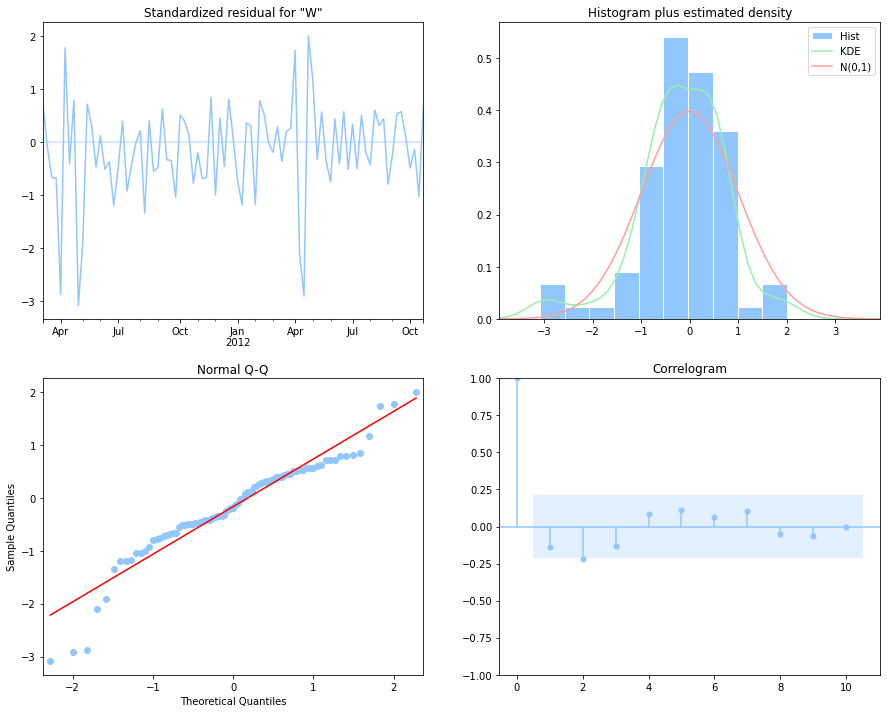

In [31]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [32]:
# Will predict for last 90 days. So setting the date according to that
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower Weekly_Sales,upper Weekly_Sales
2012-07-27,1.823588e+06,2.325759e+06
2012-08-03,1.977953e+06,2.480118e+06
2012-08-10,1.864749e+06,2.366911e+06
2012-08-17,1.992095e+06,2.494255e+06
2012-08-24,1.817325e+06,2.319484e+06
2012-08-31,1.931975e+06,2.434134e+06
2012-09-07,1.905037e+06,2.407196e+06
2012-09-14,1.798766e+06,2.300925e+06
2012-09-21,1.794635e+06,2.296791e+06
2012-09-28,1.762985e+06,2.265138e+06


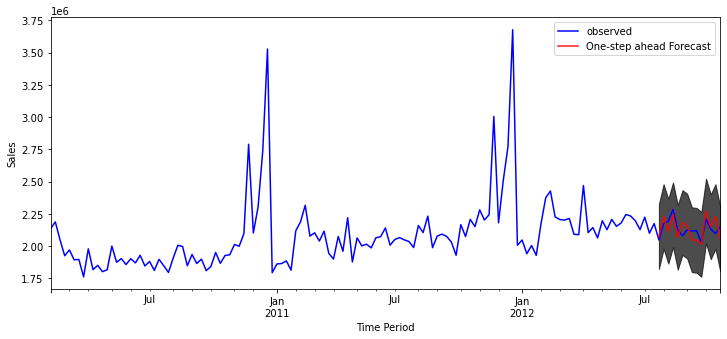

In [33]:
plt.figure(figsize=(12,5))
ax = y1['2010':].plot(label='observed',color='b')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',color='r', alpha=.9)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.7)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [34]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-07-27':]
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 68801.04


In [35]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

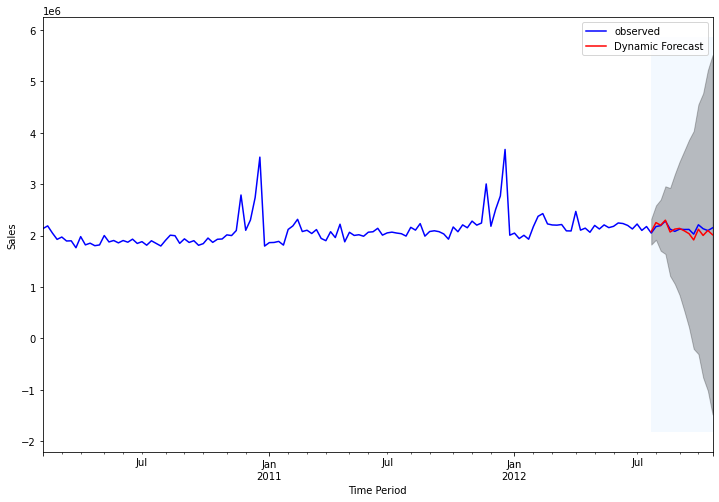

In [36]:
plt.figure(figsize=(12,8))

ax = y1['2010':].plot(label='observed', figsize=(12, 8),color='b')
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', color='r',ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-07-27'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()



In [37]:
import numpy as np
# Extract the predicted and true values of our time series
y_forecasted1 = pred_dynamic.predicted_mean
print(y_forecasted1)

2012-07-27    2.074674e+06
2012-08-03    2.251955e+06
2012-08-10    2.202086e+06
2012-08-17    2.299906e+06
2012-08-24    2.069336e+06
2012-08-31    2.125723e+06
2012-09-07    2.139604e+06
2012-09-14    2.092276e+06
2012-09-21    2.037547e+06
2012-09-28    1.914869e+06
2012-10-05    2.122774e+06
2012-10-12    2.002302e+06
2012-10-19    2.099078e+06
2012-10-26    2.015466e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [38]:
y_truth1 = y1['2012-07-27':]

print(y_truth1)

Date
2012-07-27    2048613.65
2012-08-03    2174514.13
2012-08-10    2193367.69
2012-08-17    2283540.30
2012-08-24    2125241.68
2012-08-31    2081181.35
2012-09-07    2125104.72
2012-09-14    2117854.60
2012-09-21    2119438.53
2012-09-28    2027620.23
2012-10-05    2209835.43
2012-10-12    2133026.07
2012-10-19    2097266.85
2012-10-26    2149594.46
Name: Weekly_Sales, dtype: float64


In [39]:
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted1 - y_truth1) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 73229.16


In [40]:
Residual= y_forecasted1 - y_truth1
print("Residual for Store4",np.abs(Residual).sum())

Residual for Store4 817477.6843651892


In [41]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

In [42]:
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
pred_ci

,lower Weekly_Sales,upper Weekly_Sales
2012-11-02,1.903348e+06,2.405453e+06
2012-11-09,1.753049e+06,2.421602e+06
2012-11-16,1.567070e+06,2.562688e+06
2012-11-23,2.126684e+06,3.443677e+06
2012-11-30,1.069417e+06,2.780227e+06
2012-12-07,1.108954e+06,3.245759e+06
2012-12-14,1.114837e+06,3.708202e+06
2012-12-21,1.675655e+06,4.783492e+06
2012-12-28,-3.157073e+05,3.326201e+06
2013-01-04,-6.514225e+05,3.582078e+06


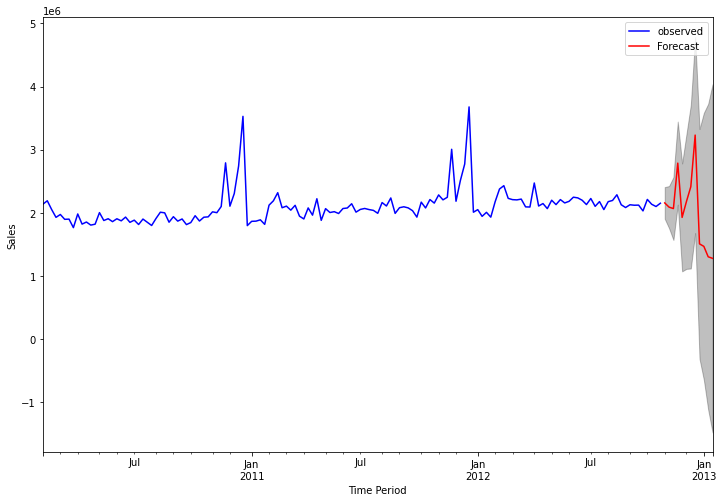

In [43]:
# Get forecast 12 weeks ahead in future visualize

ax = y1.plot(label='observed', figsize=(12, 8),color='b')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast',color='r')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

